In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree # for decision tree models
from sklearn.ensemble import RandomForestClassifier # for Random Forest (ensemble) method

%matplotlib inline

warnings.filterwarnings("ignore") 

In [2]:
input_data = pd.read_csv('ad.data ', header = 'infer')



In [3]:
input_data.head()

,125,125.1,1.0,1,0,0.1,0.2,0.3,0.4,0.5,...,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540,ad.
0,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


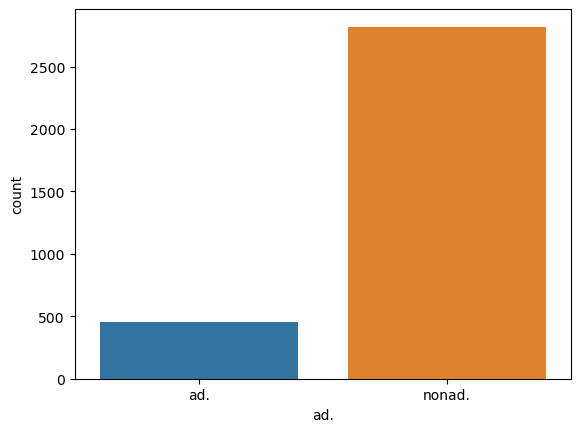

In [4]:
sns.countplot(x="ad.", data=input_data);

In [5]:
input_data.replace(to_replace ='[ ]*\?', value = np.nan, regex = True,
inplace=True)

In [6]:
input_data.isnull().values.any() #Test for nulls

True

In [7]:
nan_in_input_data = input_data.isnull().sum()

print('Number of NaN values present: ' + str(nan_in_input_data.sum())) #Finding NaN in whole data set

Number of NaN values present: 2729


In [8]:
nan_cases = input_data[pd.isnull(input_data["ad."])]

# How many nan cases do we have? 
print(nan_cases.shape)

(0, 1559)


In [9]:
input_data["ad."].unique()

array(['ad.', 'nonad.'], dtype=object)

In [10]:
input_data.dropna(axis = 0, inplace = True )
input_data.head(25)

,125,125.1,1.0,1,0,0.1,0.2,0.3,0.4,0.5,...,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540,ad.
0,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
5,59,460,7.7966,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
6,60,234,3.9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
7,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
8,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
10,90,52,0.5777,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [11]:
print(nan_cases.shape)

(0, 1559)


In [12]:

X = input_data.drop('ad.', axis=1)

# Store the target data (label/class column) into a new variable named "y"
# Extract only the label (class) column

y = input_data['ad.']


# Print the dimensions (using "shape") for both X and y 
print ("X dimensions: ", X.shape)
print ("y dimensions: ", y.shape)

X dimensions:  (2358, 1558)
y dimensions:  (2358,)


In [13]:
y.value_counts()

nonad.    1978
ad.        380
Name: ad., dtype: int64

In [14]:
le = LabelEncoder()


y = le.fit_transform(y)

In [15]:
print(le.classes_)

['ad.' 'nonad.']


In [16]:
print(le.inverse_transform(y))

['ad.' 'ad.' 'ad.' ... 'nonad.' 'nonad.' 'nonad.']


In [17]:
pd.DataFrame(y).value_counts()

1    1978
0     380
dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)



print('Shape of x_train and y_train: ', X_train.shape, y_train.shape)
print('Shape of x_test and y_test: ',   X_test.shape,  y_test.shape) #Test-Train-Split, it's stratified and 25% is tested

Shape of x_train and y_train:  (1768, 1558) (1768,)
Shape of x_test and y_test:  (590, 1558) (590,)


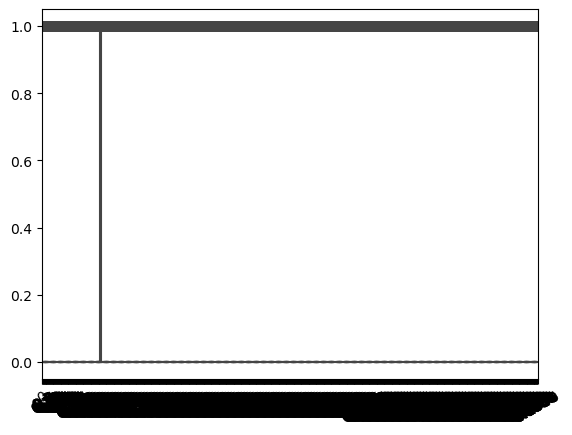

In [19]:
#Scaling
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In [20]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()  

# Fit the scaler on the X_train data - Use the scaler.fit_transform() on the X_train set 
# Assign the result back to the variable X_train 

X_train = scaler.fit_transform(X_train)

# Transform (do not fit!) the test dataset using the (fitted) scaler - 
# Use the scaler.transform() on the X_test
# Assign the result back to the variable X_test

X_test  = scaler.transform(X_test)

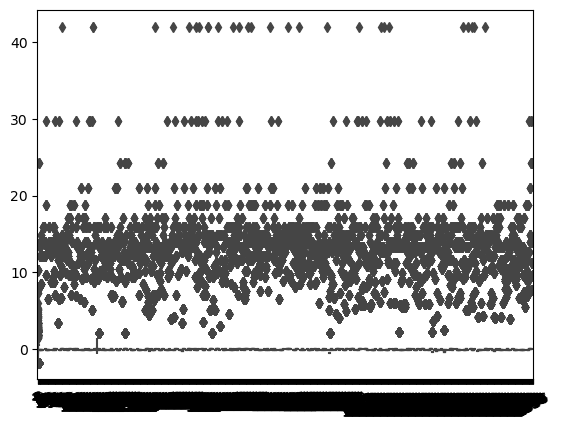

In [21]:
ax = sns.boxplot(data=X_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.show();

In [22]:
# Step 1 - Instantiate the DecisionTreeClassifier() classifier using the pre-defined parameter "max_depth=3"
# Also use "random_state=0" for reproducibility. Assign the result into a new variable named "dt"

dt = DecisionTreeClassifier(max_depth=3, random_state=0)

# Step 2 - Fit the DT model to the training set (use dt.fit())
# Pass as arguments X_train and y_train 
# No need to assign it into a new variable when calling fit()
dt.fit(X_train, y_train)

# Step 3 - Predict the test data using the dt model (use dt.predict())
# Pass as argument only X_test (not y_test!)
# Save the prediction output into a new variable "y_pred"

y_pred = dt.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.964406779661017


In [23]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 79  16]
 [  5 490]]


In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        95
           1       0.97      0.99      0.98       495

    accuracy                           0.96       590
   macro avg       0.95      0.91      0.93       590
weighted avg       0.96      0.96      0.96       590



In [25]:
input_data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.1531,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540
count,2358.000000,2358.0,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.0,...,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,0.002120,0.0,0.006361,0.004665,0.004665,0.014843,0.004665,0.006785,0.012299,0.0,...,0.001696,0.003817,0.001272,0.002120,0.002545,0.008482,0.013995,0.014843,0.009754,0.000848
std,0.046009,0.0,0.079521,0.068156,0.068156,0.120950,0.068156,0.082111,0.110238,0.0,...,0.041161,0.061675,0.035654,0.046009,0.050390,0.091725,0.117494,0.120950,0.098300,0.029117
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


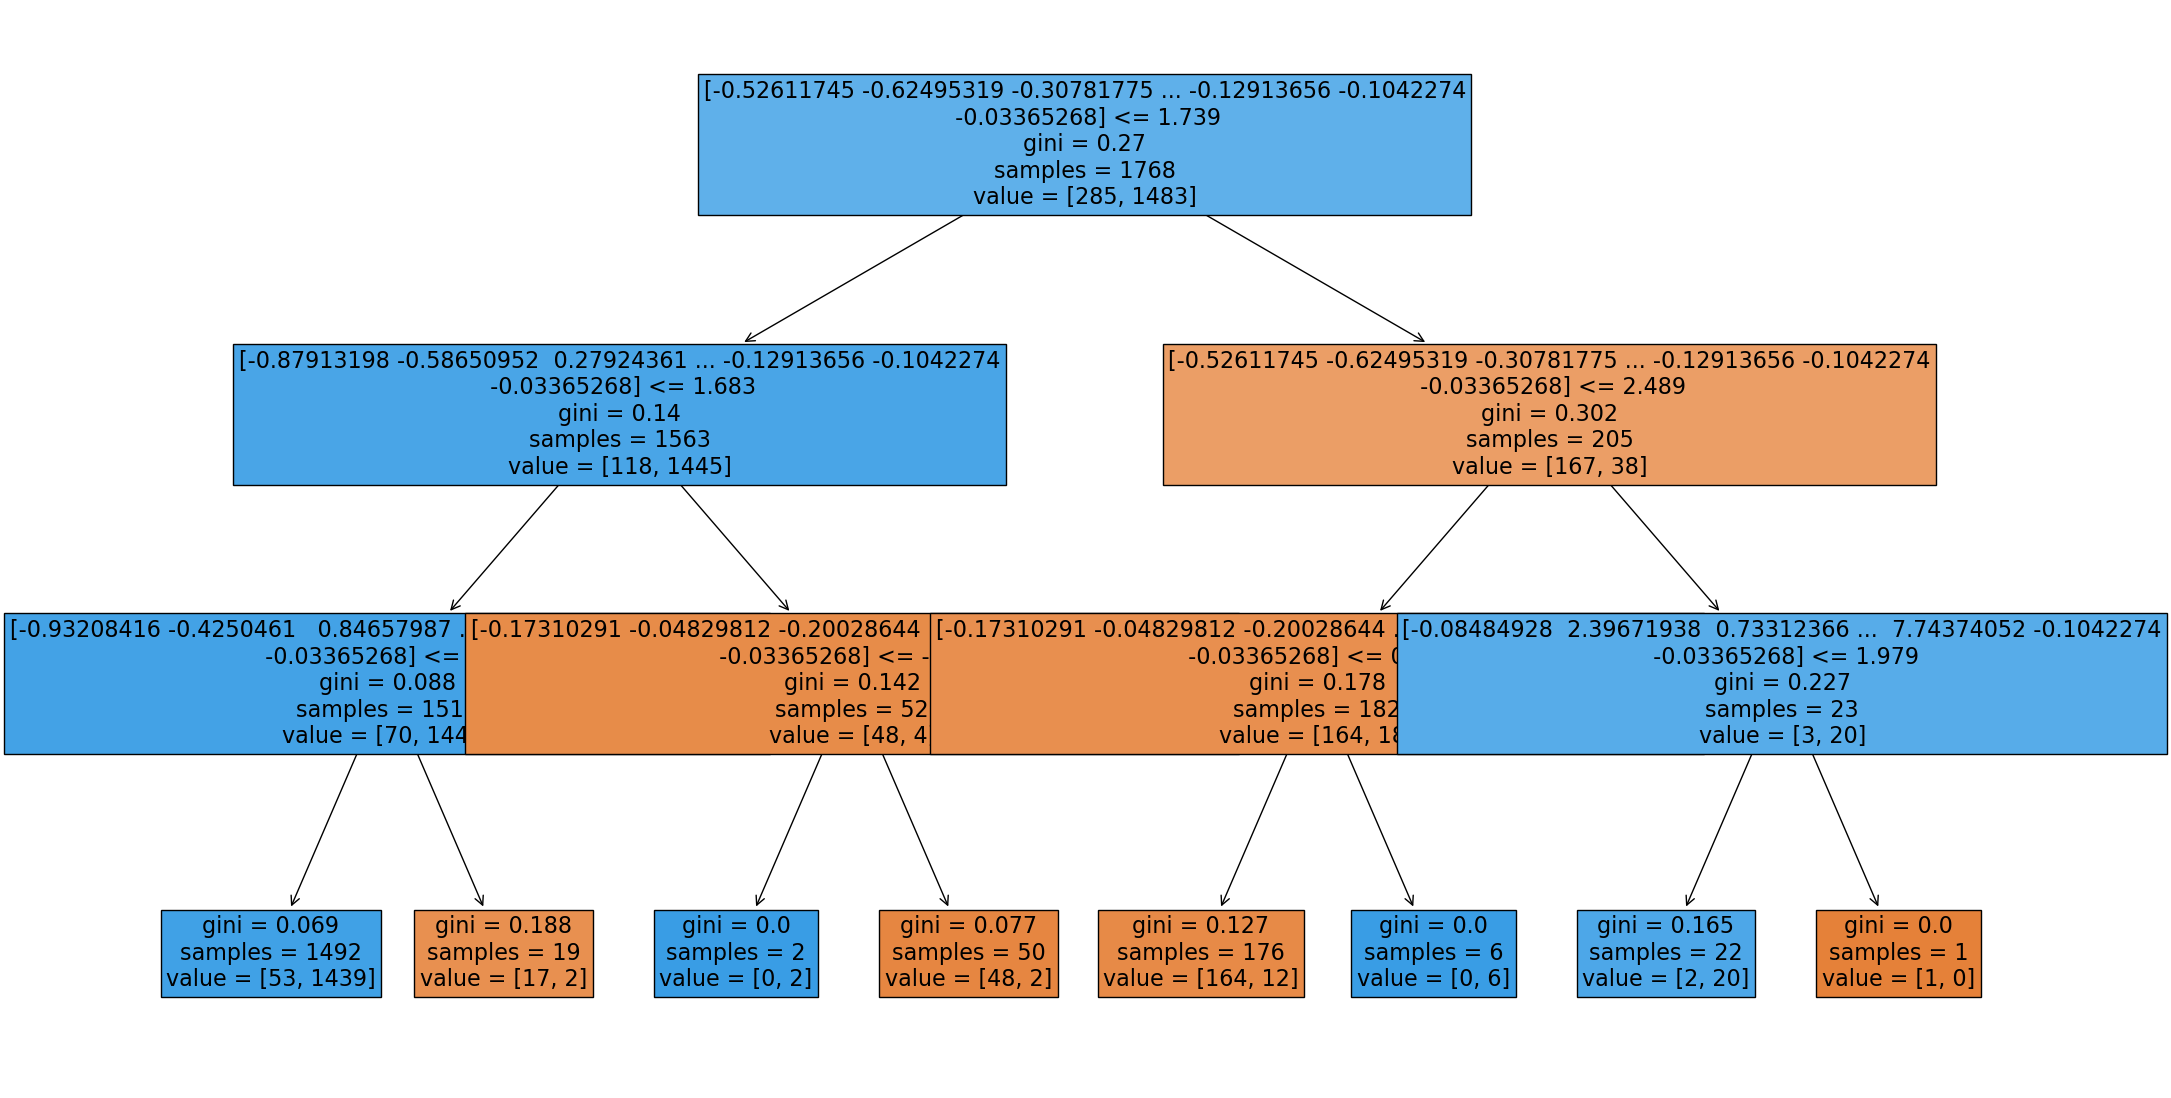

In [26]:
plt.figure(figsize=(24,14))
plot_tree(dt, feature_names=X_train, filled=True, fontsize=16)
plt.show();

In [27]:
# Step 1 - Instantiate the RandomForestClassifier() classifier using some pre-defined parameters
# Set the number of trees to 100 in the RF using 'n_estimators=100'. Also set 'random_state=0' for reproducibility. 
# Assign the result into a new variable named "rf"

rf = RandomForestClassifier(n_estimators=100, random_state=0)

# Step 2 - Fit the rf model to the training set (use rf.fit())
# Pass as arguments the train matrix X_train and the class vec y_train 
# No need to assign it into a new variable when calling fit()
rf.fit(X_train, y_train)

# Step 3 - Predict the test data using the rf model (use dt.predict())
# Pass as argument only the test matrix X_test
# Save the prediction output into a new variable "y_pred"

y_pred = rf.predict(X_test)

# Step 4 - Print the final overall accuracy for the test set using metrics.accuracy_score()
# Pass as parameters the actual values from y_test and the predicted values from y_pred

print('Test set accuracy: ', metrics.accuracy_score(y_test, y_pred))

Test set accuracy:  0.988135593220339


In [28]:

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96        95
           1       0.99      1.00      0.99       495

    accuracy                           0.99       590
   macro avg       0.99      0.97      0.98       590
weighted avg       0.99      0.99      0.99       590

